In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load your dataset
data = pd.read_csv('supermarket_sales.csv')

# Check the first few rows to understand the data
print(data.head())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [3]:
# Drop unnecessary columns
data = data.drop(['Invoice ID'], axis=1)

# Convert 'Date' and 'Time' columns to datetime
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.time

# Encode categorical columns
label_encoder = LabelEncoder()
categorical_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Check the data after encoding
print(data.head())


   Branch  City  Customer type  Gender  Product line  Unit price  Quantity  \
0       0     2              0       0             3       74.69         7   
1       2     1              1       0             0       15.28         5   
2       0     2              1       1             4       46.33         7   
3       0     2              0       1             3       58.22         8   
4       0     2              1       1             5       86.31         7   

    Tax 5%     Total       Date      Time  Payment    cogs  \
0  26.1415  548.9715 2019-01-05  13:08:00        2  522.83   
1   3.8200   80.2200 2019-03-08  10:29:00        0   76.40   
2  16.2155  340.5255 2019-03-03  13:23:00        1  324.31   
3  23.2880  489.0480 2019-01-27  20:33:00        2  465.76   
4  30.2085  634.3785 2019-02-08  10:37:00        2  604.17   

   gross margin percentage  gross income  Rating  
0                 4.761905       26.1415     9.1  
1                 4.761905        3.8200     9.6  
2    

In [4]:
# Define features (X) and target (y)
X = data.drop(['Total'], axis=1)  # Features (excluding the target column 'Total')
y = data['Total']  # Target (Total sales)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (800, 15)
Test data shape: (200, 15)


c:\Users\imjha\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:10:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Absolute Error (MAE): 1.6103824094390862
Mean Squared Error (MSE): 7.994506631874783
R-squared (R²): 0.9998771191402744


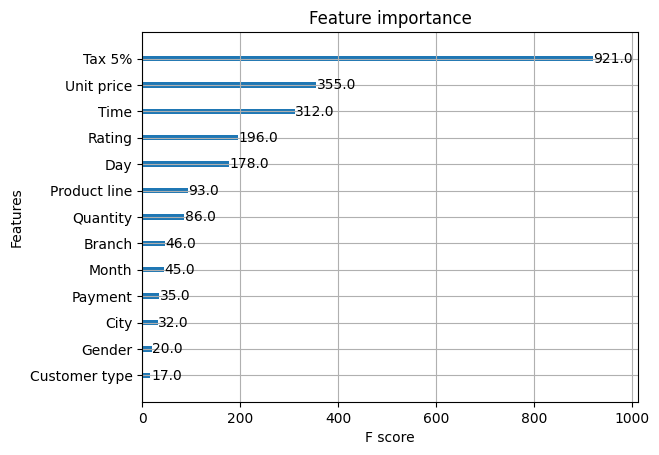

In [7]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('supermarket_sales.csv')

# Drop 'Invoice ID' (unnecessary for model training)
data = data.drop(['Invoice ID'], axis=1)

# Convert 'Date' to datetime format and extract useful features
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Convert 'Time' to a numerical feature (in hours)
data['Time'] = pd.to_datetime(data['Time'].astype(str), format='%H:%M').dt.hour + pd.to_datetime(data['Time'].astype(str), format='%H:%M').dt.minute / 60

# Drop original 'Date' and 'Time' columns
data = data.drop(['Date'], axis=1)

# Encode categorical columns
label_encoder = LabelEncoder()
categorical_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Define features (X) and target (y)
X = data.drop(['Total'], axis=1)  # Features
y = data['Total']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for XGBoost
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'learning_rate': 0.1,  # Step size shrinkage
    'max_depth': 6,  # Maximum depth of trees
    'alpha': 10,  # L1 regularization term
    'n_estimators': 100  # Number of boosting rounds
}

# Train the model
xgb_model = xgb.train(params=params, dtrain=train_dmatrix, num_boost_round=100)

# Make predictions on the test data
y_pred = xgb_model.predict(test_dmatrix)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Feature importance
xgb.plot_importance(xgb_model)
plt.show()


In [8]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 6, 8],
    'n_estimators': [50, 100, 200],
    'alpha': [0, 1, 10]
}

# Create a XGBoost regressor
xgb_reg = xgb.XGBRegressor()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'alpha': 1, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


In [9]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores
scores = cross_val_score(xgb_reg, X, y, cv=5, scoring='neg_mean_absolute_error')
print("Cross-Validation MAE scores:", -scores)
print("Mean Cross-Validation MAE:", -scores.mean())


Cross-Validation MAE scores: [3.00333887 2.64366384 2.58069464 3.02521401 2.78065387]
Mean Cross-Validation MAE: 2.8067130470047


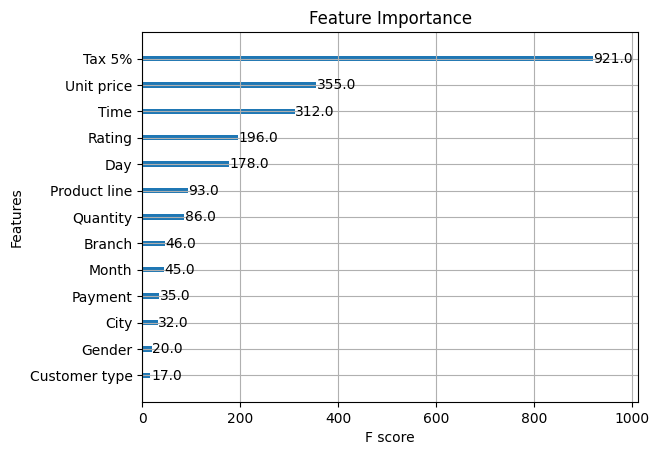

In [10]:
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_model)
plt.title('Feature Importance')
plt.show()


In [11]:
import joblib

# Save the model to a file
joblib.dump(xgb_model, 'xgboost_model.pkl')

# Load the model
loaded_model = joblib.load('xgboost_model.pkl')
